In [ ]:
import numpy as np
import math
import random
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt 
import healpy as hp
from healpy.newvisufunc import projview, newprojplot
from matplotlib.pyplot import figure
from mpl_toolkits import mplot3d
import csv
import fractions
import scipy

In [ ]:
# revise filename as needed
df =  pd.read_csv("Perp_value.csv",sep="\t")
B_perp=np.array(df)

32
Number of pixels:
12288
Map:
[    0     1     2 ... 12285 12286 12287]
Plot map
Pixel theta (colatitude) and phi (longitude) in radians:


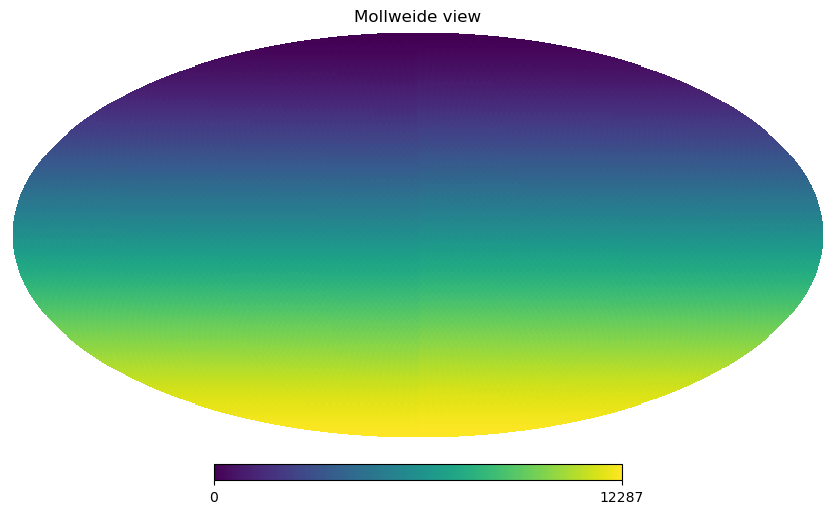

In [15]:
nside = hp.pixelfunc.order2nside(5)
print(nside)
npix = hp.nside2npix(nside)
print("Number of pixels:")
print(npix)
m =  np.arange(npix)
print("Map:")
print(m)
print("Plot map")
hp.mollview(m)
print("Pixel theta (colatitude) and phi (longitude) in radians:")
i_pix = np.arange(npix)
theta, phi = hp.pix2ang(nside, i_pix, nest=False, lonlat=False  )

<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
/var/folders/7g/d4vwf6r91jj0zj5c_6hg7qgr0000gn/T/ipykernel_88246/3885168872.py:17: SyntaxWarning: invalid escape sequence '\m'
  unit="$\mu$G",
/Users/kuoliao/miniforge3/lib/python3.12/site-packages/healpy/newvisufunc.py:407: UserWarning: 
 *** Overriding default plot properies: {'cbar_shrink': 0.4, 'cbar_pad': 0.01, 'cbar_label_pad': 0, 'cbar_tick_direction': 'out', 'vertical_tick_rotation': 90, 'figure_width': 12, 'figure_size_ratio': 0.63} ***
  warnings.warn(
/Users/kuoliao/miniforge3/lib/python3.12/site-packages/healpy/newvisufunc.py:411: UserWarning: 
 *** New plot properies: {'cbar_shrink': 0.5, 'cbar_pad': 0.01, 'cbar_label_pad': -15, 'cbar_tick_direction': 'out', 'vertical_tick_rotation': 90, 'figure_width': 15, 'figure_size_ratio': 0.4} ***
  warnings.warn("\n *** New plot properies: " + str(plot_properties) + " ***")


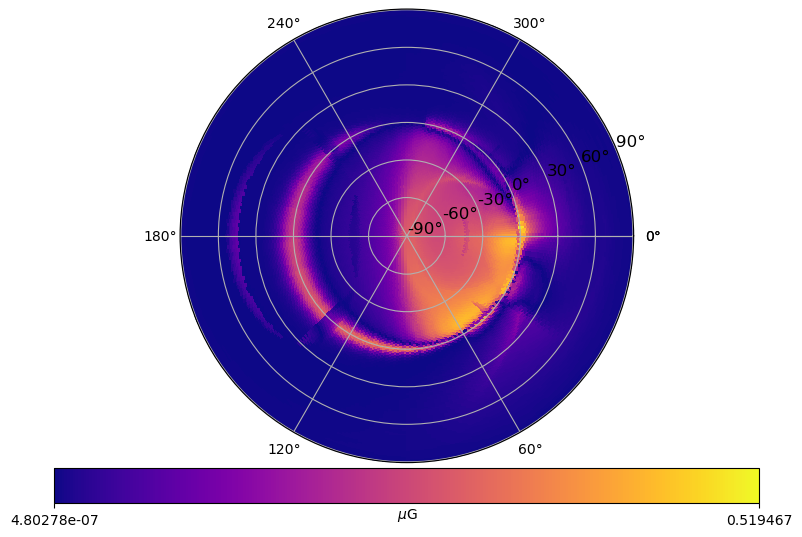

In [ ]:
pixel_indices = hp.ang2pix(nside,theta,phi,lonlat=True)
npix = hp.nside2npix(nside)
i_pix = np.arange(npix)
m_0=hp.ma(np.arange(hp.nside2npix(nside), dtype=np.double))
for i in range(npix):
    m_0[i] = np.linalg.norm(B_perp[i])   ## for probability calculating today


projview(
    m_0,
    coord=["G"],
    hold=False,
    graticule=True,
    graticule_labels=True,
    flip="astro",
    projection_type="polar",
    unit="$\mu$G",
    cb_orientation="horizontal",
    xsize=300,
    fontsize={"xtick_label": 10,"cbar_label": 10,"cbar_tick_label": 10},
    override_plot_properties={
        "cbar_shrink": 0.5,
        "cbar_pad": 0.01,
        "cbar_label_pad": -15,
        "figure_width": 15,
        "figure_size_ratio": 0.4,
    },
    cmap='plasma'
)
